In [1]:
#import required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read sale data.csv
data = pd.read_csv("/Users/changlu/Downloads/sales_data.csv")
data

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [3]:
#drop duplicates
data.drop_duplicates(inplace=True)
data

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
996,Product_36,NaN,46.19,9.0,2024-09-23
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


In [4]:
#drop rows with unknown regions
data = data.dropna(subset='Region')
data

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
994,Product_1,Region_4,95.24,7.0,2024-09-21
995,NaN,Region_7,31.83,13.0,2024-09-22
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


In [5]:
#create a column called "Revenue" by multiplying "Price" and "Units sold"
data['Revenue'] = data['Price'] * data['Units Sold']
data

/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_78808/1044972516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data['Price'] * data['Units Sold']


,Product,Region,Price,Units Sold,Sale Date,Revenue
0,NaN,Region_6,75.96,10.0,2022-01-01,759.60
1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68
995,NaN,Region_7,31.83,13.0,2024-09-22,413.79
997,NaN,Region_7,311.80,13.0,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


In [6]:
#fill unknown "prices" and "units sold" with mean numbers to avoid error
data['Price'].fillna((data['Price'].mean()), inplace=True)
data['Units Sold'].fillna((data['Units Sold'].mean()), inplace=True)
data


/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_78808/1957294785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'].fillna((data['Price'].mean()), inplace=True)
/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_78808/1957294785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Units Sold'].fillna((data['Units Sold'].mean()), inplace=True)


,Product,Region,Price,Units Sold,Sale Date,Revenue
0,NaN,Region_6,75.96,10.0,2022-01-01,759.60
1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68
995,NaN,Region_7,31.83,13.0,2024-09-22,413.79
997,NaN,Region_7,311.80,13.0,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


Data cleaning completed, continue to plot process

Text(0, 0.5, 'Count')

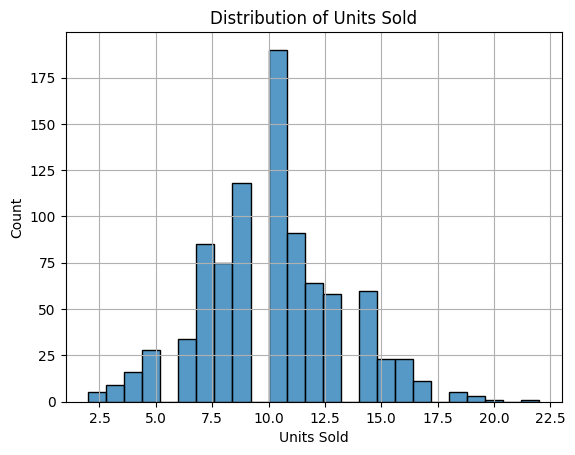

In [7]:
#Check overall distribution of "Units Sold":  (with histplot and boxplot)
sns.histplot(data['Units Sold'])
plt.grid()
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

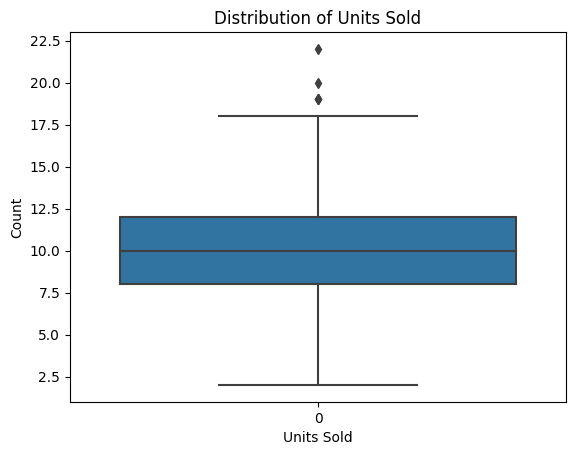

In [8]:
sns.boxplot(data['Units Sold'])
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Count')

Text(0, 0.5, 'Units Sold')

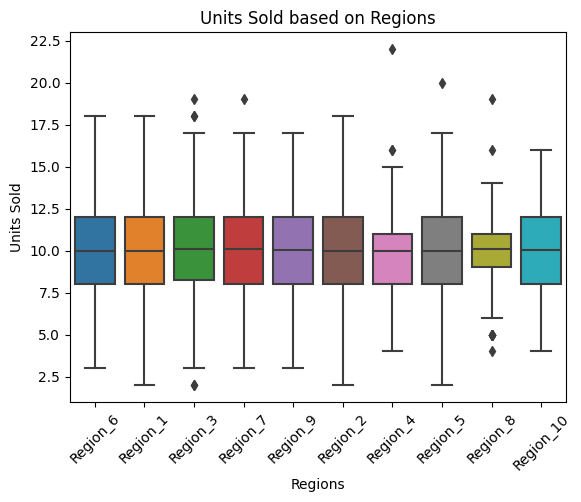

In [9]:
#Observe Units Sold based on different regions:
sns.boxplot(data = data, x = 'Region', y = 'Units Sold' )
plt.xticks(rotation = 45)
plt.title('Units Sold based on Regions')
plt.xlabel('Regions')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Price')

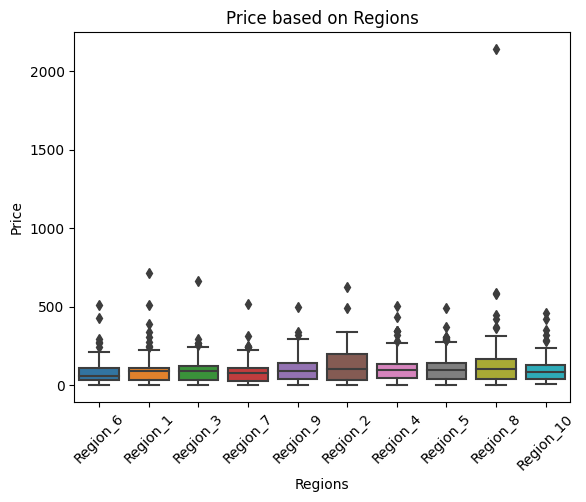

In [10]:
#Check overall distribution of "Price":  (with histplot and boxplot)
sns.boxplot(data = data, x = 'Region', y = 'Price' )
plt.xticks(rotation = 45)
plt.title('Price based on Regions')
plt.xlabel('Regions')
plt.ylabel('Price')

In [11]:
#We found an outlier here in region 8, need to remove it
data[data['Price'] >= 1500]

,Product,Region,Price,Units Sold,Sale Date,Revenue
969,Product_15,Region_8,2143.3,5.0,2024-08-27,10716.5


In [12]:
#drop outlier at row 969
data.drop(969, inplace = True)
data

/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_78808/3480339137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(969, inplace = True)


,Product,Region,Price,Units Sold,Sale Date,Revenue
0,NaN,Region_6,75.96,10.0,2022-01-01,759.60
1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68
995,NaN,Region_7,31.83,13.0,2024-09-22,413.79
997,NaN,Region_7,311.80,13.0,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


Text(0, 0.5, 'Price')

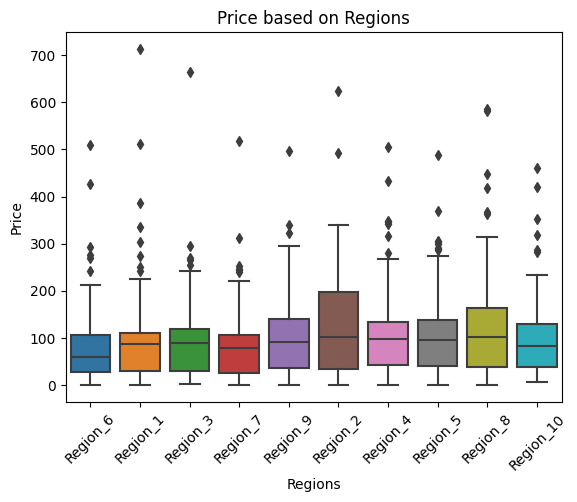

In [13]:
sns.boxplot(data = data, x = 'Region', y = 'Price' )
plt.xticks(rotation = 45)
plt.title('Price based on Regions')
plt.xlabel('Regions')
plt.ylabel('Price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Region_1'),
  Text(1, 0, 'Region_10'),
  Text(2, 0, 'Region_2'),
  Text(3, 0, 'Region_3'),
  Text(4, 0, 'Region_4'),
  Text(5, 0, 'Region_5'),
  Text(6, 0, 'Region_6'),
  Text(7, 0, 'Region_7'),
  Text(8, 0, 'Region_8'),
  Text(9, 0, 'Region_9')])

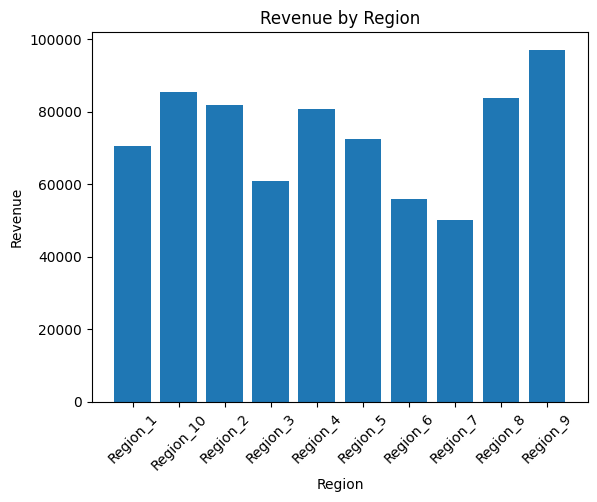

In [14]:
#Check overall distribution of "Revenue":  (with histplot and boxplot)
data_grouped = data.groupby('Region')['Revenue'].sum().reset_index()

plt.figure()
plt.bar(data_grouped['Region'], data_grouped['Revenue'])
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')

plt.xticks(rotation = 45)


/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_78808/1728075760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['YearQuarter'] = pd.to_datetime(data['Sale Date']).dt.to_period('Q').astype(str)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2022Q1'),
  Text(1, 0, '2022Q2'),
  Text(2, 0, '2022Q3'),
  Text(3, 0, '2022Q4'),
  Text(4, 0, '2023Q1'),
  Text(5, 0, '2023Q2'),
  Text(6, 0, '2023Q3'),
  Text(7, 0, '2023Q4'),
  Text(8, 0, '2024Q1'),
  Text(9, 0, '2024Q2'),
  Text(10, 0, '2024Q3')])

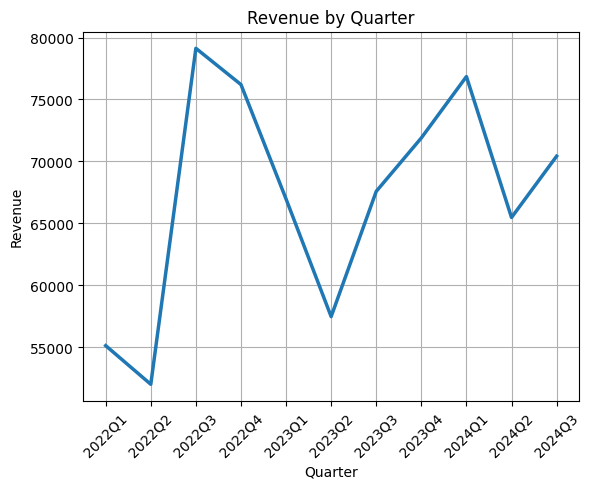

In [15]:
#Observe data based on sales date (Quarter)
data['YearQuarter'] = pd.to_datetime(data['Sale Date']).dt.to_period('Q').astype(str)
data_Q = data.groupby('YearQuarter')['Revenue'].sum().reset_index()

plt.figure()
plt.plot(data_Q['YearQuarter'], data_Q['Revenue'], linewidth=2.5)
plt.title('Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation = 45)



In [16]:
data

,Product,Region,Price,Units Sold,Sale Date,Revenue,YearQuarter
0,NaN,Region_6,75.96,10.0,2022-01-01,759.60,2022Q1
1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24,2022Q1
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16,2022Q1
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70,2022Q1
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14,2022Q1
...,...,...,...,...,...,...,...
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68,2024Q3
995,NaN,Region_7,31.83,13.0,2024-09-22,413.79,2024Q3
997,NaN,Region_7,311.80,13.0,2024-09-24,4053.40,2024Q3
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60,2024Q3


In [17]:
#drop rows with NaN products
data = data.dropna(subset='Product')
data

,Product,Region,Price,Units Sold,Sale Date,Revenue,YearQuarter
2,Product_46,Region_3,20.43,12.000000,2022-01-03,245.16,2022Q1
3,Product_36,Region_1,12.77,10.000000,2022-01-04,127.70,2022Q1
4,Product_17,Region_6,125.69,6.000000,2022-01-05,754.14,2022Q1
5,Product_45,Region_1,8.63,11.000000,2022-01-06,94.93,2022Q1
6,Product_31,Region_3,23.73,6.000000,2022-01-07,142.38,2022Q1
...,...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,10.066421,2024-09-15,NaN,2024Q3
993,Product_7,Region_9,128.51,17.000000,2024-09-20,2184.67,2024Q3
994,Product_1,Region_4,95.24,7.000000,2024-09-21,666.68,2024Q3
998,Product_2,Region_10,43.44,15.000000,2024-09-25,651.60,2024Q3


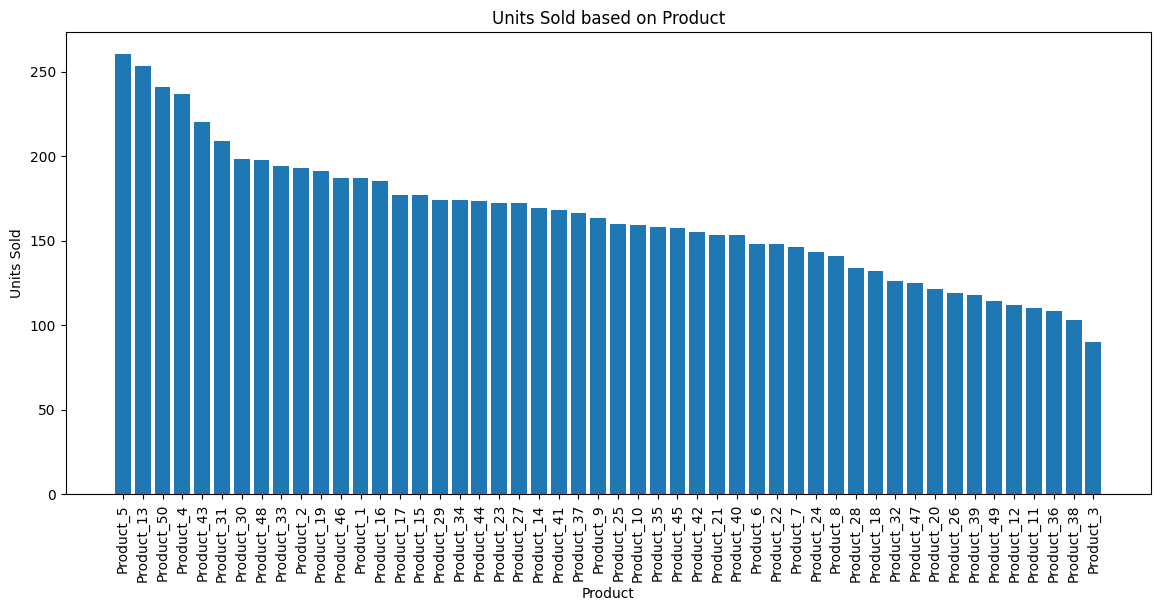

In [18]:
#Observe Units Sold based on different Products:
#groupby products
product_units_sold = data.groupby('Product')['Units Sold'].sum().reset_index()

#Sort from most to least, since there are way too many products
product_units_sold = product_units_sold.sort_values('Units Sold', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(product_units_sold['Product'], product_units_sold['Units Sold'])
plt.xticks(rotation=90)
plt.title('Units Sold based on Product')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.show()

Question:
1) What conclusions can you draw about sales performance of various products and regions?

    i)Based on the box plot for regions and units sold, most regions have similar sale performance with an median units sold of 10 and similar Q1 and Q3. However, region 4 and 7 have a comparably low median. Region 4 has lower IQR but more outliers. Region 7, 8 and 10 have bigger IQR, which means they are more likely to spend more on the products.

    ii)According to the region & revenue graph, region 9 has the most revenue, which means it has a strong economy. Region 3 and 7 are relatively weaker region in consumption.

    iii)Consumption is extremely strong during Q3 and Q4 every year. The trend may remain until Q1 the next year, but Q2 is gauranteed the lowest every year.

    iv)Product 5,13,50,4,43,31 are among the most popular product, whereas product 3,38,36,11,12 are much less consumed.
    

2) What recommendations do you have for the business?

    i)Based on the box plot for regions and prices of units sold, region 2 and 8 have a larger IQR, which means they generally spend more on products and have a better business opportunity in the future. Region 6 and 7 have both lower IQR and median, which means they may not be perfect regions to expand their business. 
    Other regions have similar IQRs and medians, it is okay to continue operation but further expansion in business may not be considered.

    ii)According to the region & revenue graph, consumption is strong in region 2,4,8,9,10 and weak in region 3 and 7. Therefore the business owner may expand their business in region 2,4,8,9,10, and maybe limit investment in 3 and 7. 

    iii)Revenue is low during Q1 and Q2 every year, therefore the business owner should decrease the expected sales for Q1 and Q2. The sales usually recovers during Q3 and Q4, thus an investment in the second half-year will generate more revenue and profit. 

    iv)Due to the differentiated popularity, I would suggest the business owner to sell more Product 5,13,50,4,43,31 as they are the best sellers. Reduce the number of product 3,38,36,11,12 sold as they are not popular products.


3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

    First of all, I dropped all the duplicates as it is possible to have the same transactions to the same regions in the same day. 

    Later I dropped all rows with unknown regions as I was unable to confirm where the products were selling to. I set up the 'Revenue' column as it can make it easier to compare the purchasing power between different regions.

    To deal with unknown price and unit sold, I filled with means using groupby as they will not change the result much. 

    In the region & price step, I drop the only outlier as it was way too big for the whole list. 

    To further investigate the relationship between revenue and sale time, I convert the sale time data to the form "2022Q1" and used groupby to combine the revenue in the same quarter. Therefore it is easier to compare the revenue trend throughout the year.

    I came up with the idea of creating a graph based on product later, the only two thing I did were dropping rows with NaN products and using the groupby function to make it easier to create a graph.
